This notebook shows how to load data exported from QuPath, compute metrics and display them, according to the configuration file. This is meant for a single-animal.

There are some conventions that need to be met in the QuPath project so that the measurements are usable with `cuisto`:
+ Objects' classifications must be derived, eg. be in the form "something: else". The primary classification ("something") will be refered to "object_type" and the secondary classification ("else") to "channel" in the configuration file.
+ Only one "object_type" can be processed at once, but supports any numbers of channels.
+ Annotations (brain regions) must have properly formatted measurements. For punctual objects, it would be the count. Run the "add_regions_count.groovy" script to add them. The measurements names must be in the form "something: else name", for instance, "something: else Count". "name" is refered to "base_measurement" in the configuration file.

You should copy this notebook, the configuration file and the atlas-related configuration files (blacklist and fusion) elsewhere and edit them according to your need.

The data was generated from QuPath with stardist cell detection on toy data.

In [1]:
import pandas as pd

import cuisto

In [2]:
# Full path to your configuration file, edited according to your need beforehand
config_file = "../../resources/demo_config_cells.toml"

In [3]:
# - Files
# animal identifier
animal = "animalid0"
# set the full path to the annotations tsv file from QuPath
annotations_file = "../../resources/cells_measurements_annotations.tsv"
# set the full path to the detections tsv file from QuPath
detections_file = "../../resources/cells_measurements_detections.tsv"

In [4]:
# get configuration
cfg = cuisto.config.Config(config_file)

In [5]:
# read data
df_annotations = pd.read_csv(annotations_file, index_col="Object ID", sep="\t")
df_detections = pd.read_csv(detections_file, index_col="Object ID", sep="\t")

# remove annotations that are not brain regions
df_annotations = df_annotations[df_annotations["Classification"] != "Region*"]
df_annotations = df_annotations[df_annotations["ROI"] != "Rectangle"]

# convert atlas coordinates from mm to microns
df_detections[["Atlas_X", "Atlas_Y", "Atlas_Z"]] = df_detections[
    ["Atlas_X", "Atlas_Y", "Atlas_Z"]
].multiply(1000)

# have a look
display(df_annotations.head())
display(df_detections.head())

,Image,Object type,Name,Classification,Parent,ROI,Centroid X µm,Centroid Y µm,Cells: marker+ Count,Cells: marker- Count,ID,Side,Parent ID,Num Detections,Num Cells: marker+,Num Cells: marker-,Area µm^2,Perimeter µm
Object ID,,,,,,,,,,,,,,,,,,
4781ed63-0d8e-422e-aead-b685fbe20eb5,animalid0_030.ome.tiff,Annotation,Root,NaN,Root object (Image),Geometry,5372.5,3922.1,0,0,NaN,NaN,NaN,2441,136,2305,31666431.6,37111.9
aa4b133d-13f9-42d9-8c21-45f143b41a85,animalid0_030.ome.tiff,Annotation,root,Right: root,Root,Polygon,7094.9,4085.7,0,0,997,0.0,NaN,1284,41,1243,15882755.9,18819.5
42c3b914-91c5-4b65-a603-3f9431717d48,animalid0_030.ome.tiff,Annotation,grey,Right: grey,root,Geometry,7256.8,4290.6,0,0,8,0.0,997.0,1009,24,985,12026268.7,49600.3
887af3eb-4061-4f8a-aa4c-fe9b81184061,animalid0_030.ome.tiff,Annotation,CB,Right: CB,grey,Geometry,7778.7,3679.2,0,16,512,0.0,8.0,542,5,537,6943579.0,30600.2
adaabc05-36d1-4aad-91fe-2e904adc574f,animalid0_030.ome.tiff,Annotation,CBN,Right: CBN,CB,Geometry,6790.5,3567.9,0,0,519,0.0,512.0,55,1,54,864212.3,7147.4


,Image,Object type,Name,Classification,Parent,ROI,Atlas_X,Atlas_Y,Atlas_Z
Object ID,,,,,,,,,
5ff386a8-5abd-46d1-8e0d-f5c5365457c1,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11523.0,4272.4,4276.7
9a2a9a8c-acbe-4308-bc5e-f3c9fd1754c0,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11520.2,4278.4,4418.6
481a519b-8b40-4450-9ec6-725181807d72,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11506.0,4317.2,4356.3
fd28e09c-2c64-4750-b026-cd99e3526a57,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11528.4,4257.4,4336.4
3d9ce034-f2ed-4c73-99be-f782363cf323,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11548.7,4203.3,4294.3


In [6]:
# get distributions per regions, spatial distributions and coordinates
df_regions, dfs_distributions, df_coordinates = cuisto.process.process_animal(
    animal, df_annotations, df_detections, cfg, compute_distributions=True
)

# have a look
display(df_regions.head())
display(df_coordinates.head())

,Name,hemisphere,Area µm^2,Area mm^2,count,density µm^-2,density mm^-2,coverage index,relative count,relative density,channel,animal
0,ACVII,Left,8307.1,0.008307,1,0.00012,120.378953,0.00012,0.002132,0.205275,Positive,animalid0
0,ACVII,Left,8307.1,0.008307,1,0.00012,120.378953,0.00012,0.000189,0.020671,Negative,animalid0
1,ACVII,Right,7061.4,0.007061,0,0.0,0.0,0.0,0.0,0.0,Positive,animalid0
1,ACVII,Right,7061.4,0.007061,1,0.000142,141.614977,0.000142,0.000144,0.021646,Negative,animalid0
2,ACVII,both,15368.5,0.015369,1,0.000065,65.068159,0.000065,0.001362,0.153797,Positive,animalid0


,Image,Object type,Name,Classification,Parent,ROI,Atlas_X,Atlas_Y,Atlas_Z,hemisphere,channel,Atlas_AP,Atlas_DV,Atlas_ML,animal
Object ID,,,,,,,,,,,,,,,
5ff386a8-5abd-46d1-8e0d-f5c5365457c1,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5230,4.2724,4.2767,Right,Negative,-6.433716,3.098278,-1.4233,animalid0
9a2a9a8c-acbe-4308-bc5e-f3c9fd1754c0,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5202,4.2784,4.4186,Right,Negative,-6.431449,3.104147,-1.2814,animalid0
481a519b-8b40-4450-9ec6-725181807d72,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5060,4.3172,4.3563,Right,Negative,-6.420685,3.141780,-1.3437,animalid0
fd28e09c-2c64-4750-b026-cd99e3526a57,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5284,4.2574,4.3364,Right,Negative,-6.437788,3.083737,-1.3636,animalid0
3d9ce034-f2ed-4c73-99be-f782363cf323,animalid0_030.ome.tiff,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5487,4.2033,4.2943,Right,Negative,-6.453296,3.031224,-1.4057,animalid0


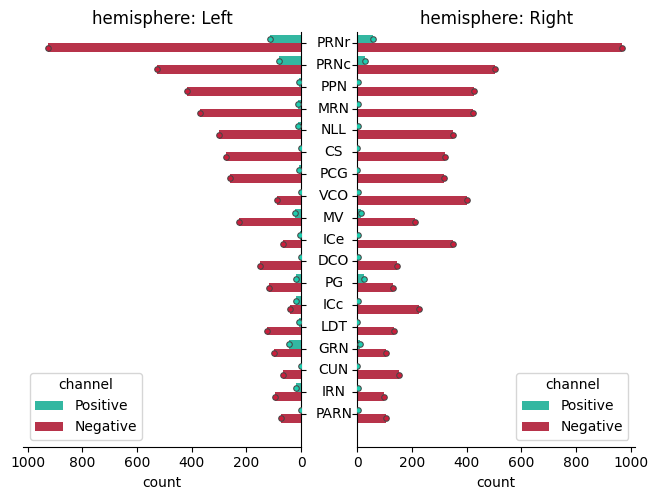

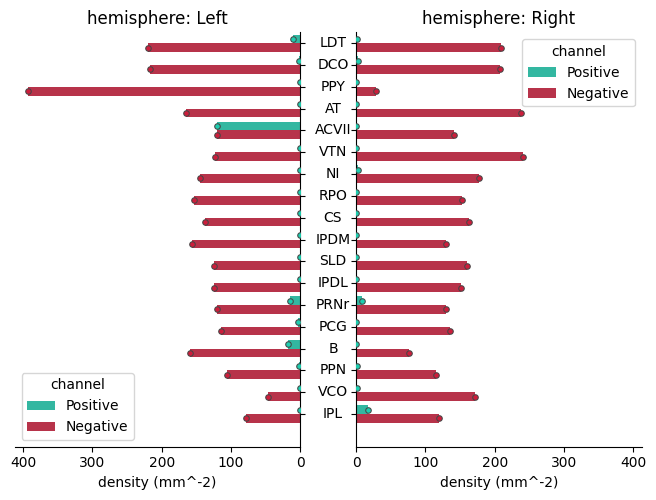

In [7]:
# plot distributions per regions
figs_regions = cuisto.display.plot_regions(df_regions, cfg)
# specify which regions to plot
# figs_regions = cuisto.display.plot_regions(df_regions, cfg, names_list=["GRN", "IRN", "MDRNv"])

# save as svg
# figs_regions[0].savefig(r"C:\Users\glegoc\Downloads\regions_count.svg")
# figs_regions[1].savefig(r"C:\Users\glegoc\Downloads\regions_density.svg")

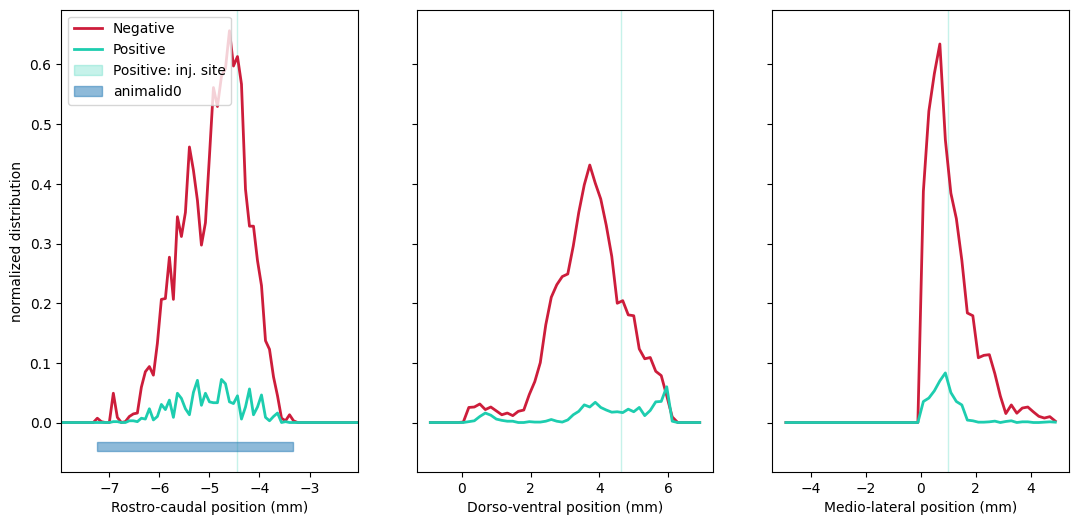

In [8]:
# plot 1D distributions
fig_distrib = cuisto.display.plot_1D_distributions(
    dfs_distributions, cfg, df_coordinates=df_coordinates
)

If there were several `animal` in the measurement file, it would be displayed as mean +/- sem instead.

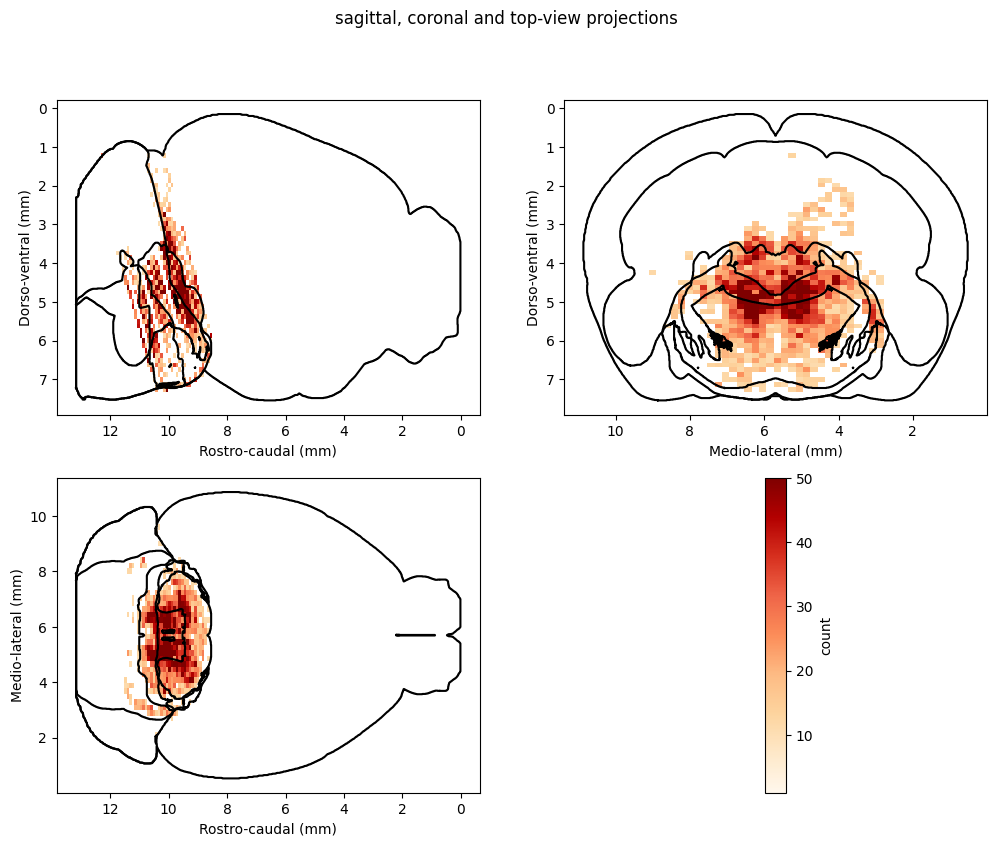

In [9]:
# plot heatmap (all types of cells pooled)
fig_heatmap = cuisto.display.plot_2D_distributions(df_coordinates, cfg)